<a href="https://colab.research.google.com/github/GabiAugusta/ipea-social-benefit-time-series/blob/main/serie3_social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
dados=pd.read_csv('/content/dados_ipeadata_2.txt')
dados

,ano,mes,valor_beneficio
0,2013,1,1970843.43
1,2013,2,1964147.37
2,2013,3,2076786.31
3,2013,4,2051462.25
4,2013,5,2080949.98
...,...,...,...
95,2020,12,2730699.90
96,2021,1,2712375.60
97,2021,2,2665125.71
98,2021,3,2708579.69


In [ ]:
# Juntar ano e mes, e converter para data
dados['data']=pd.to_datetime(dados['ano'].astype(str)+dados['mes'].astype(str).str.zfill(2)+'01',format='%Y%m%d')

# Excluindo as colunas anteriores
dados=dados.drop(['ano', 'mes'], axis=1)

print(dados)

    valor_beneficio       data
0        1970843.43 2013-01-01
1        1964147.37 2013-02-01
2        2076786.31 2013-03-01
3        2051462.25 2013-04-01
4        2080949.98 2013-05-01
..              ...        ...
95       2730699.90 2020-12-01
96       2712375.60 2021-01-01
97       2665125.71 2021-02-01
98       2708579.69 2021-03-01
99       2726005.24 2021-04-01

[100 rows x 2 columns]


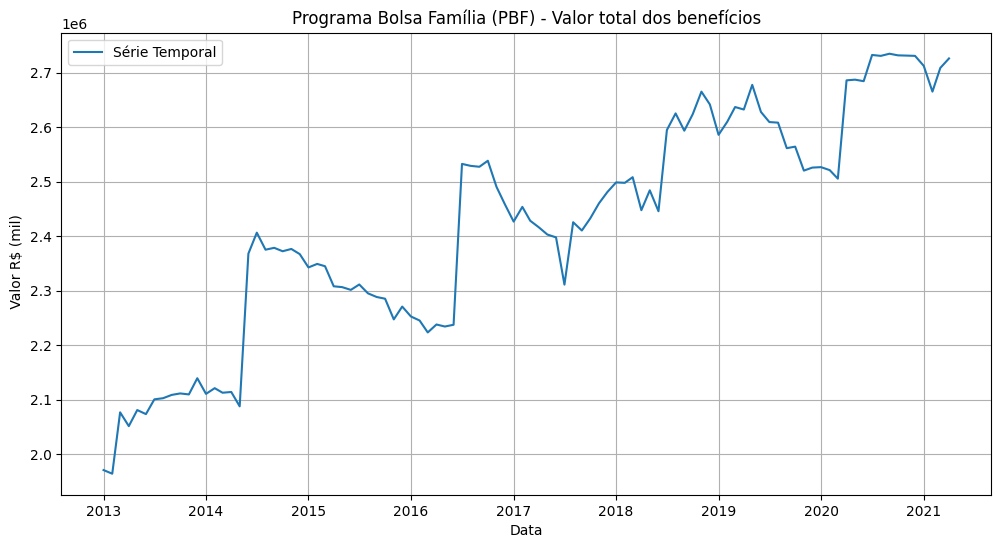

In [ ]:
# Plotando a serie temporal

plt.figure(figsize=(12, 6))
plt.plot(dados['data'], dados['valor_beneficio'], label='Série Temporal')

plt.ylabel(' Valor R$ (mil)')
plt.xlabel('Data')
plt.title('Programa Bolsa Família (PBF) - Valor total dos benefícios')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ajustando a tendencia
dados['dados_num'] = (dados['data'] - dados['data'].min()) / np.timedelta64(1, 'D')
slope, intercept = np.polyfit(dados['dados_num'], dados['valor_beneficio'], deg=1)
tendencia = slope * dados['dados_num'] + intercept


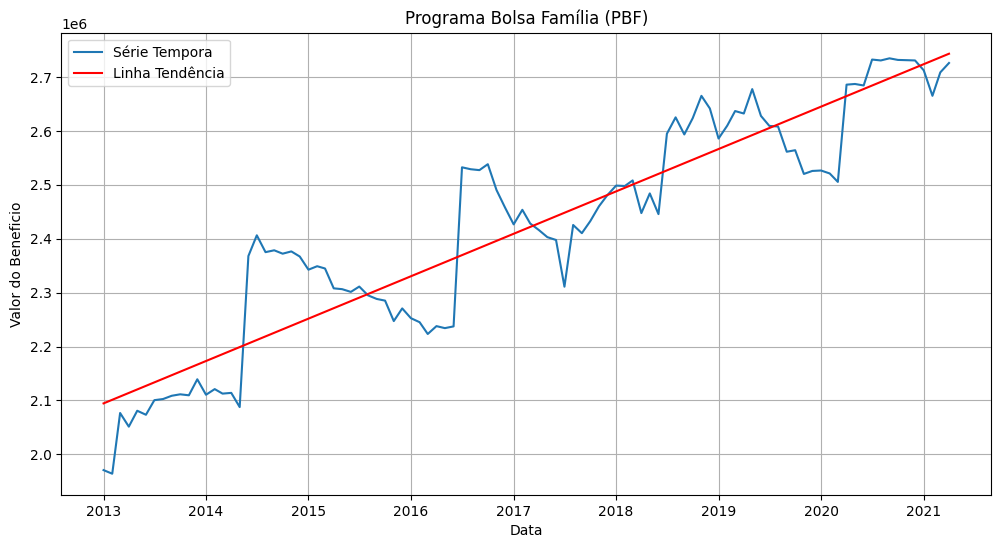

In [ ]:
# Plotando a série com a tendencia

plt.figure(figsize=(12, 6))
plt.plot(dados['data'], dados['valor_beneficio'], label='Série Tempora')
plt.plot(dados['data'], tendencia, label='Linha Tendência', color='red')
plt.xlabel('Data')
plt.ylabel('Valor do Beneficio')
plt.title('Programa Bolsa Família (PBF)')
plt.legend()
plt.grid(True)
plt.show()


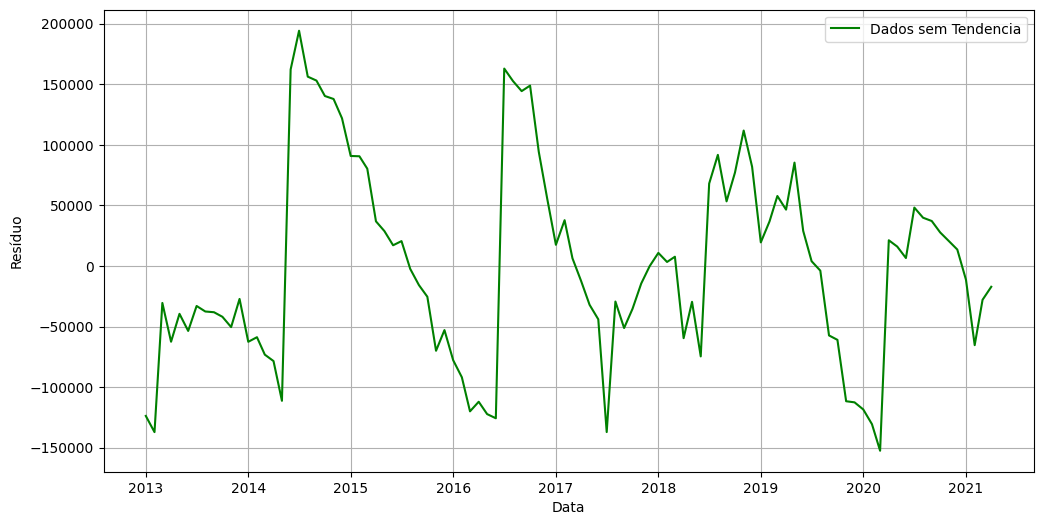

In [ ]:
# Subtraindo a tendencia dos dados
residuals=dados['valor_beneficio']-tendencia
plt.figure(figsize=(12, 6))
plt.plot(dados['data'], residuals, label='Dados sem Tendencia', color='green')
plt.xlabel('Data')
plt.ylabel('Resíduo')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Definindo função para série de Fourier
def calculate_fourier_series(data, seasonal_period):
    n = len(data)
    time = np.arange(n)
    seasonal_component = np.zeros(n)

    for k in range(1, seasonal_period // 2 + 1):
        omega = 2 * np.pi * k / seasonal_period
        a_k = 2 / n * np.sum(data * np.cos(omega * time))
        b_k = 2 / n * np.sum(data * np.sin(omega * time))
        seasonal_component += a_k * np.cos(omega * time) + b_k * np.sin(omega *
                                                                        time)

    return seasonal_component

# Componente sazonal
periodo_sazonal=12  # 12 meses
componente_sazonal=calculate_fourier_series(dados['valor_beneficio']-tendencia,
                                            periodo_sazonal)


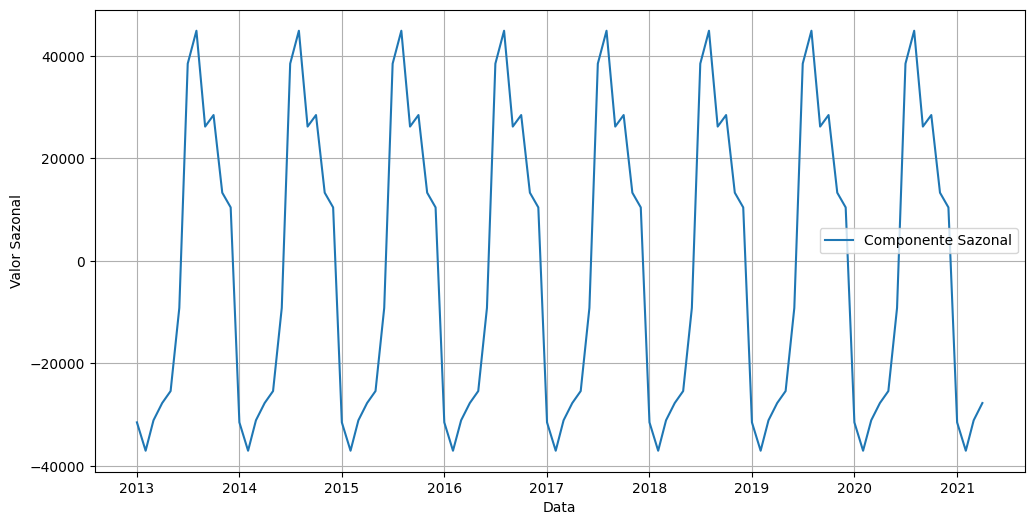

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados['data'], componente_sazonal, label='Componente Sazonal')
plt.xlabel('Data')
plt.ylabel('Valor Sazonal')

plt.legend()
plt.grid(True)
plt.show()


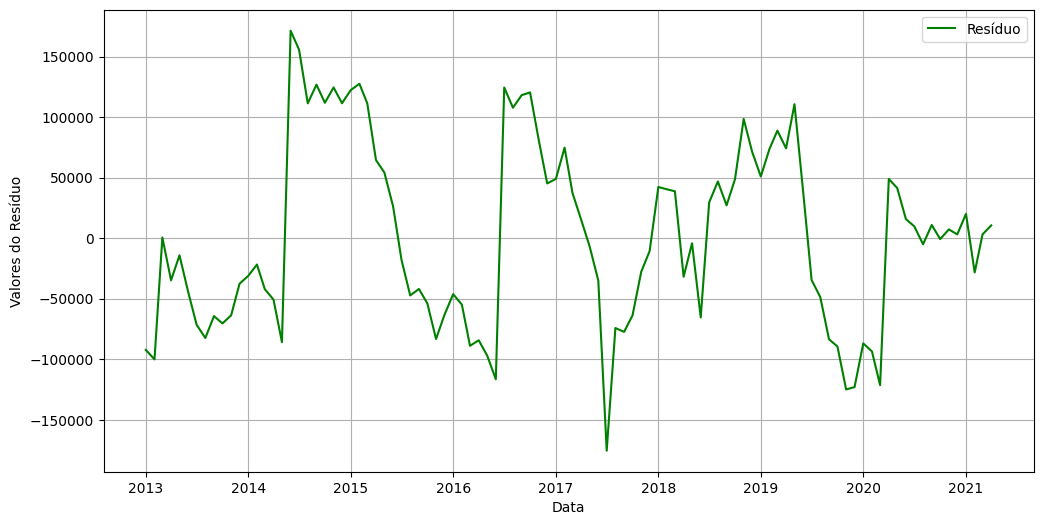

In [ ]:
# Definindo o residuo

residuo_dados = dados['valor_beneficio']-componente_sazonal-tendencia



# Plotando o resíduo
plt.figure(figsize=(12, 6))
plt.plot(dados['data'], residuo_dados, label='Resíduo', color='green')
plt.xlabel('Data')
plt.ylabel('Valores do Resíduo')

plt.legend()
plt.grid(True)
plt.show()


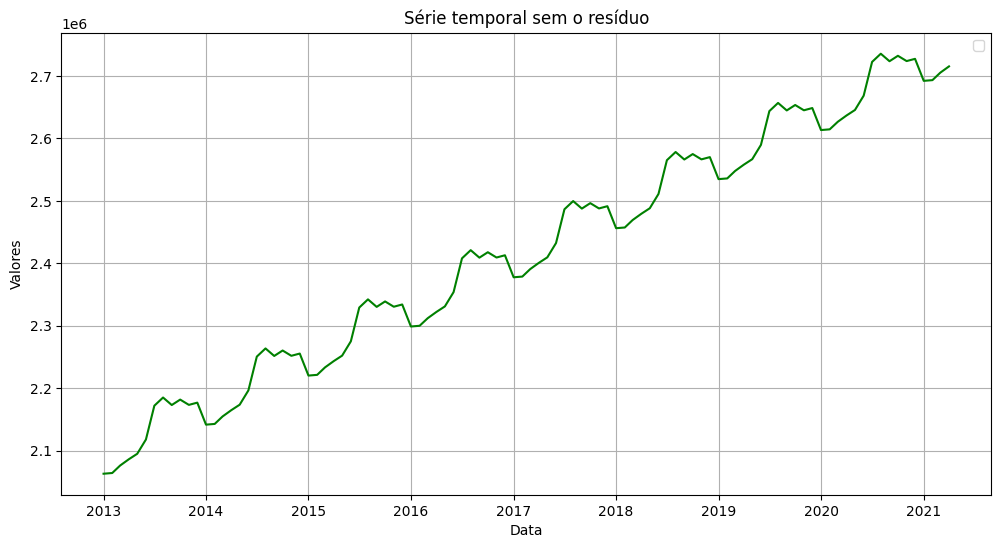

In [ ]:

tm_sem_residuo = dados['valor_beneficio'] - residuo_dados



# Plot the deseasonalized data (residuals)
plt.figure(figsize=(12, 6))
plt.plot(dados['data'], tm_sem_residuo, color='green')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Série temporal sem o resíduo')
plt.legend()
plt.grid(True)
plt.show()

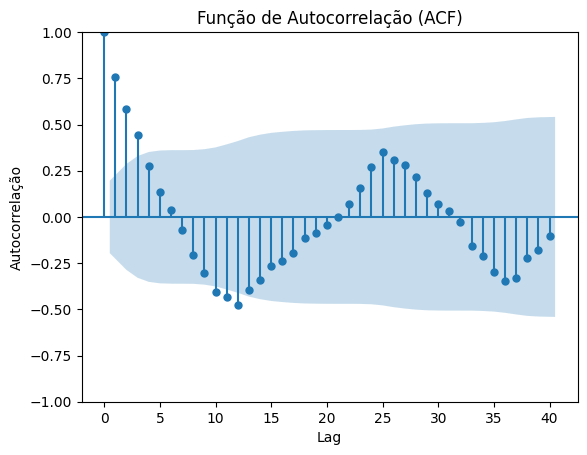

In [ ]:
# Verificando a Autocorrelação do resíduo

# Plotando ACF
sm.graphics.tsa.plot_acf(residuo_dados, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.title('Função de Autocorrelação (ACF)')

plt.show()

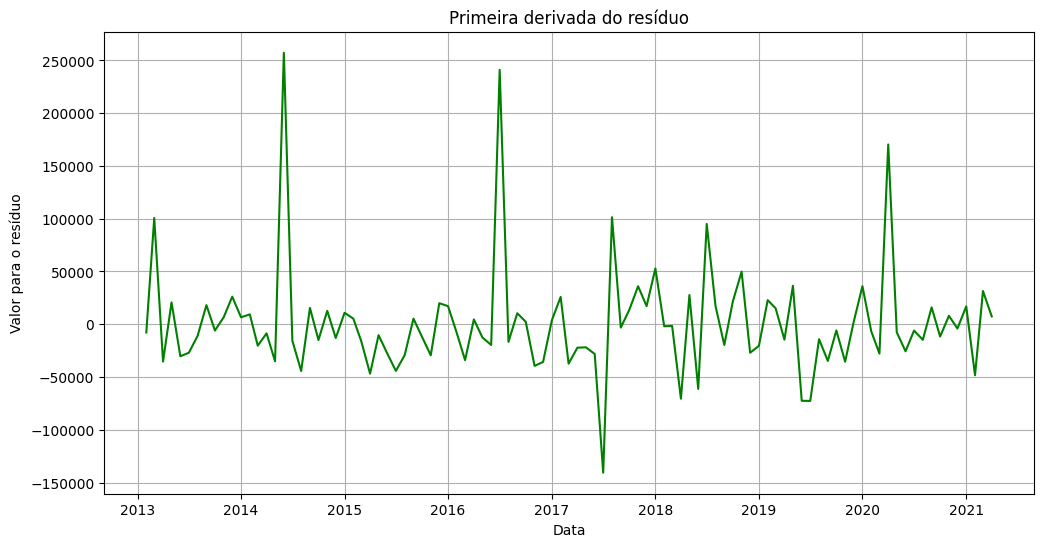

In [ ]:
# Primeira Derivada do resídup

residuo_diferenciacao = residuo_dados.diff()




# Plotando a derivada
plt.figure(figsize=(12, 6))
plt.plot(dados['data'], residuo_diferenciacao, color='green')
plt.xlabel('Data')
plt.ylabel('Valor para o resíduo')
plt.title('Primeira derivada do resíduo')

plt.grid(True)
plt.show()

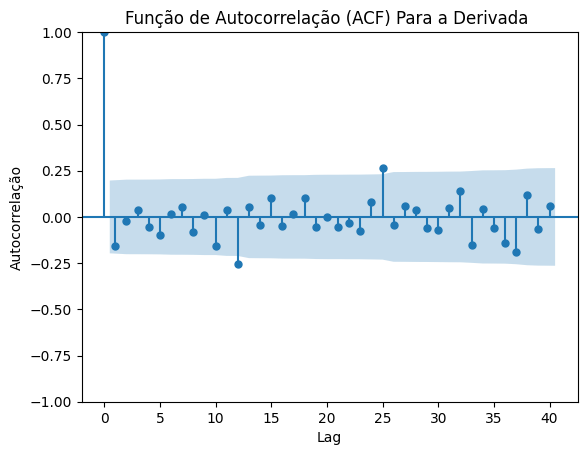

In [ ]:
# Plot the ACF
sm.graphics.tsa.plot_acf(residuo_diferenciacao.dropna(), lags=40)
plt.xlabel('Lag')

plt.ylabel('Autocorrelação')
plt.title('Função de Autocorrelação (ACF) Para a Derivada ')

plt.show()

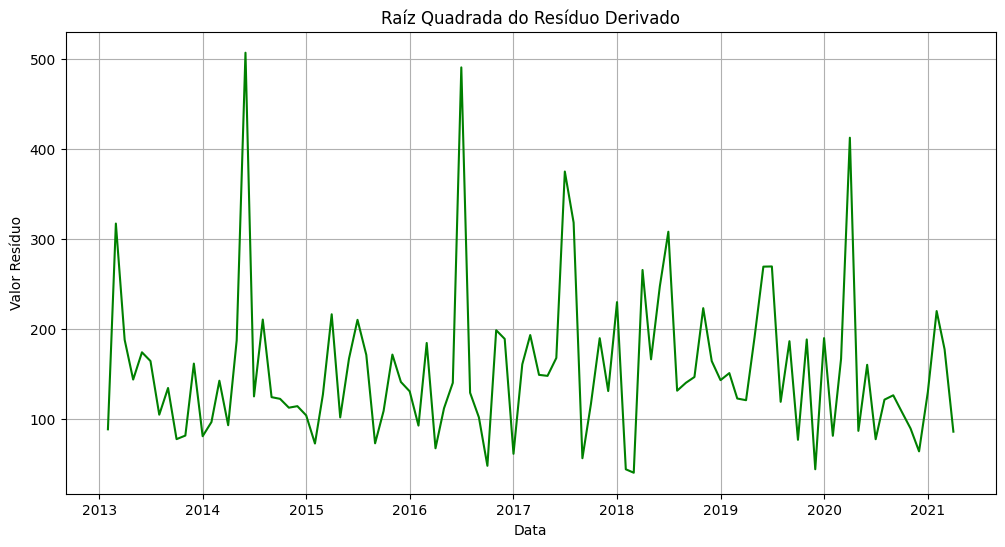

In [ ]:
#Raiz da derivada do residuo

residuo_sqrt = np.sqrt(np.abs(residuo_diferenciacao))

plt.figure(figsize=(12, 6))
plt.plot(dados['data'], residuo_sqrt, color='green')
plt.xlabel('Data')
plt.ylabel('Valor Resíduo')
plt.title('Raíz Quadrada do Resíduo Derivado')

plt.grid(True)
plt.show()

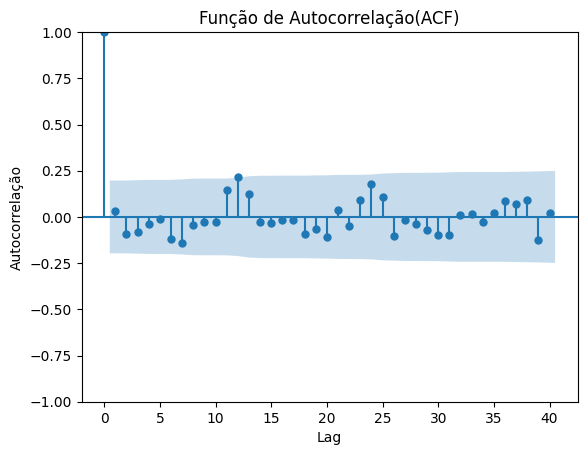

In [ ]:
# Plot the ACF
sm.graphics.tsa.plot_acf(residuo_sqrt.dropna(), lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.title('Função de Autocorrelação(ACF)')

plt.show()

In [ ]:
model = sm.tsa.ARIMA(residuo_sqrt, order=(1, 0, 0))
results = model.fit()


print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -579.996
Date:                Tue, 26 Sep 2023   AIC                           1165.993
Time:                        15:19:39   BIC                           1173.808
Sample:                             0   HQIC                          1169.156
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.1735     12.776     12.224      0.000     131.133     181.214
ar.L1          0.0326      0.121      0.269      0.788      -0.205       0.270
sigma2      7207.7312    817.968      8.812      0.0

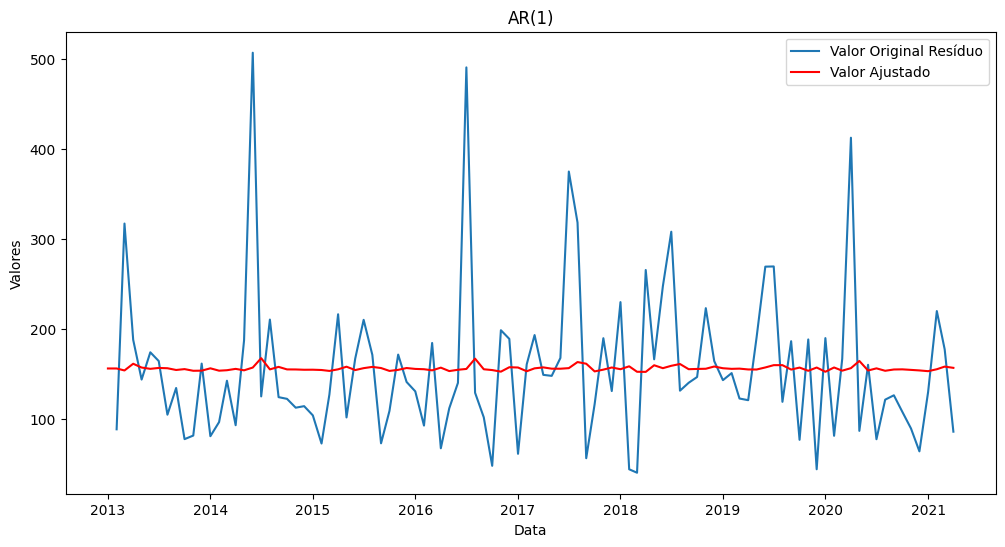

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados['data'],residuo_sqrt, label='Valor Original Resíduo')
plt.plot(dados['data'],results.fittedvalues, label='Valor Ajustado', color='red')

plt.title('AR(1)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

In [ ]:
model_2 = sm.tsa.ARIMA(residuo_sqrt, order=(2, 0, 0))
results_2 = model_2.fit()

# Print model summary
print(results_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -579.524
Date:                Tue, 26 Sep 2023   AIC                           1167.048
Time:                        15:19:47   BIC                           1177.469
Sample:                             0   HQIC                          1171.266
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.1220     11.444     13.642      0.000     133.692     178.552
ar.L1          0.0376      0.124      0.304      0.761      -0.205       0.280
ar.L2         -0.0990      0.137     -0.720      0.4

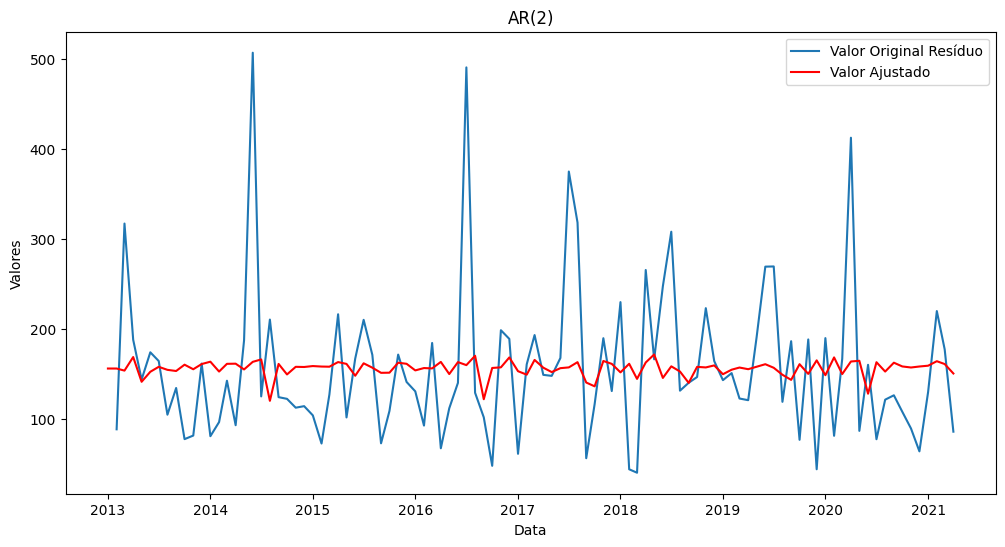

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados['data'],residuo_sqrt, label='Valor Original Resíduo')
plt.plot(dados['data'],results_2.fittedvalues, label='Valor Ajustado', color='red')

plt.title('AR(2)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

In [ ]:
model_3 = sm.tsa.ARIMA(residuo_sqrt, order=(0, 0, 1))
results_3 = model_3.fit()

# Print model summary
print(results_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -579.984
Date:                Tue, 26 Sep 2023   AIC                           1165.968
Time:                        15:20:00   BIC                           1173.784
Sample:                             0   HQIC                          1169.131
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.1458     12.806     12.193      0.000     131.046     181.246
ma.L1          0.0399      0.121      0.329      0.742      -0.198       0.278
sigma2      7179.5240    811.381      8.849      0.0

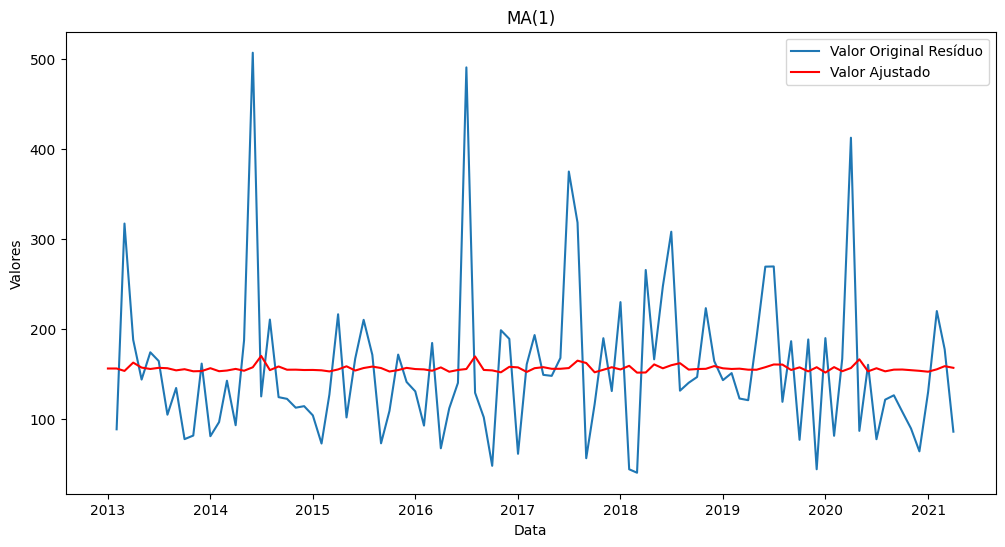

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados['data'],residuo_sqrt, label='Valor Original Resíduo')
plt.plot(dados['data'],results_3.fittedvalues, label='Valor Ajustado', color='red')

plt.title('MA(1)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

In [ ]:
model_4 = sm.tsa.ARIMA(residuo_sqrt, order=(0, 0, 2))
results_4 = model_4.fit()

# Print model summary
print(results_4.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -579.514
Date:                Tue, 26 Sep 2023   AIC                           1167.028
Time:                        15:21:04   BIC                           1177.449
Sample:                             0   HQIC                          1171.246
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.1279     11.117     14.044      0.000     134.339     177.917
ma.L1          0.0193      0.121      0.160      0.873      -0.217       0.256
ma.L2         -0.1083      0.131     -0.825      0.4

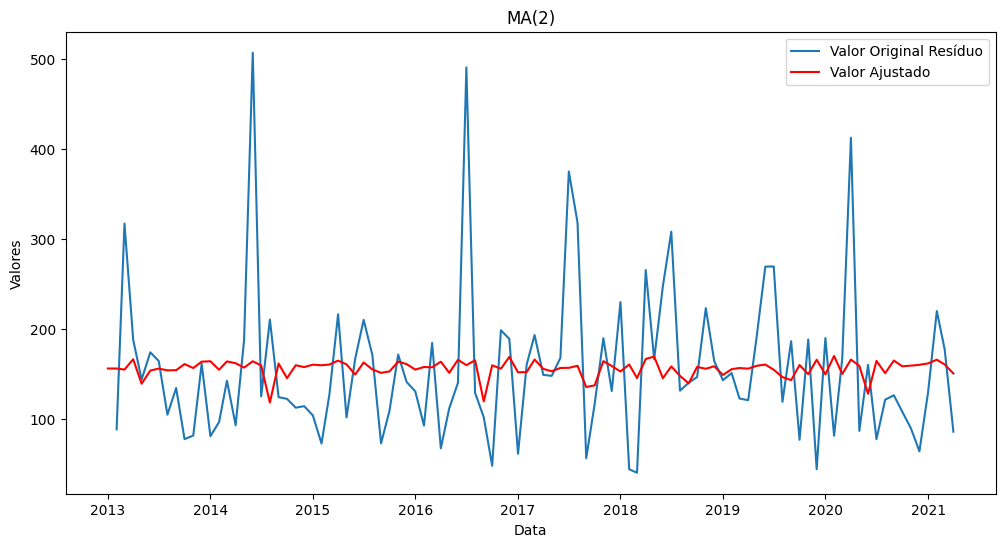

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados['data'],residuo_sqrt, label='Valor Original Resíduo')
plt.plot(dados['data'],results_4.fittedvalues, label='Valor Ajustado', color='red')

plt.title('MA(2)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()